#  Programming for Data Analysis Project


### Problem Statement 

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.<br><br>
Specifically, in this project you should:<br><br>
    • Choose a real-world phenomenon that can be measured and for which you could
    collect at least one-hundred data points across at least four different variables.<br>
    • Investigate the types of variables involved, their likely distributions, and their
    relationships with each other.<br>
    • Synthesise/simulate a data set as closely matching their properties as possible.<br>
    • Detail your research and implement the simulation in a Jupyter notebook – the
    data set itself can simply be displayed in an output cell within the notebook.<br>

### Attendances at an Emergency Department over a period of 24 hours

The real world phenomenon that I have chosen for this project is 24 hours in an Emergency Department. I am going to base this off a real live Emergency Deparment dataset.I work in the Health Service Executive and I have access and am familiar with this data. I have a sample dataset which I am going to import into my project and discuss the different variables and distributions of each. I am then going to simulate my own dataset based on the variable types and possible distributions.

The dataset that I will base my simulated dataset off is calld EDAttendances24Hour.csv and is within this project.


The variables that I am going to use are listed below. There are 6 variables in total. - <br><br>

• Date of Attendance - Date the patient registers with the Emergency Department<br>
• Age of Patient - The Age of the patient when they attend the Emergency Department - Non-Zero integer<br>
• Hours in ED - The number of hours the patient was in the department - Non-Negative Real number with no decimal places<br>
• Triage Category - Triage category will be values 1 - 5. 1 being the most serious patient -  Non-Zero integer<br>
• Sex - Categorical Variable - 2 possible values - Male and Female<br>
• Discharge Distination - This variable is where the patient was discharged to - Categorical Variable - Did Not Wait, Discharged Home, Admitted to Ward, Death (in ED) <br><br>
    
I am going to go through each variable and describe the type of variable, the distribution of the variable and the relationship that variable has with other variables in the dataset. <br><br>


I am briefly going to summarize the dataset that I am going to base my synthesized dataset off. I can do this using Pandas.


In [850]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in CSV file

EDAttendances24Hour  = pd.read_csv('EDAttendances24Hour.csv')

EDAttendances24Hour.describe() 

EDAttendances24Hour.info()

# There are 6 columns in the dataset. 3 objects and 3 int64(numerical fields). Pandas sees the registration column as an object.
# Below I will convert the Registration field into a datetime value. This is the date and time that patient attends the Emergency
# Department.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   REGISTRATION        123 non-null    object
 1   DISCH_DEST          123 non-null    object
 2   Age                 123 non-null    int64 
 3   Hours_in_Deparment  123 non-null    int64 
 4   TRIAGE_CATEGORY     123 non-null    int64 
 5   GENDER              123 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.9+ KB


### Types of Variables and Scales of Measurement

Before I go into detail about the variable types in my project I need to explain the data types that can be assigned and why you would assign a particular data type to a variable.

There are two types of data 

1. Qualitative - Refers to information about qualities, or information that cannot be measured.<br>
2. Quantitative - is numerical. It’s used to define information that can be counted.<br><br>
    
Straight away we can put our variables into two very simple groups. The two groups above can be further broken down however and when modelling and understanding our data we need to understand the data types within the dataset.<br><br>


Quantitative, or numerical, data can be broken down into two types: discrete and continuous.<br><br>

1. Discrete - Discrete data is a whole number that can’t be divided or broken into individual parts, fractions or decimals.<br>
2. Continuous - Continuous data describes values that can be broken down into different parts, units, fractions and decimals

### Qualitative or Categorical Data 

This type of data is non-numerical. It can be used to describe the information in a dataset or the description of a variable. 

### Scales of Measurement

There are 4 different scales of measurment also. See 

- Nominal
- Ordinal 
- Ratio
- Interval 

See graphic below for explanation of each of the scale of measurement. 

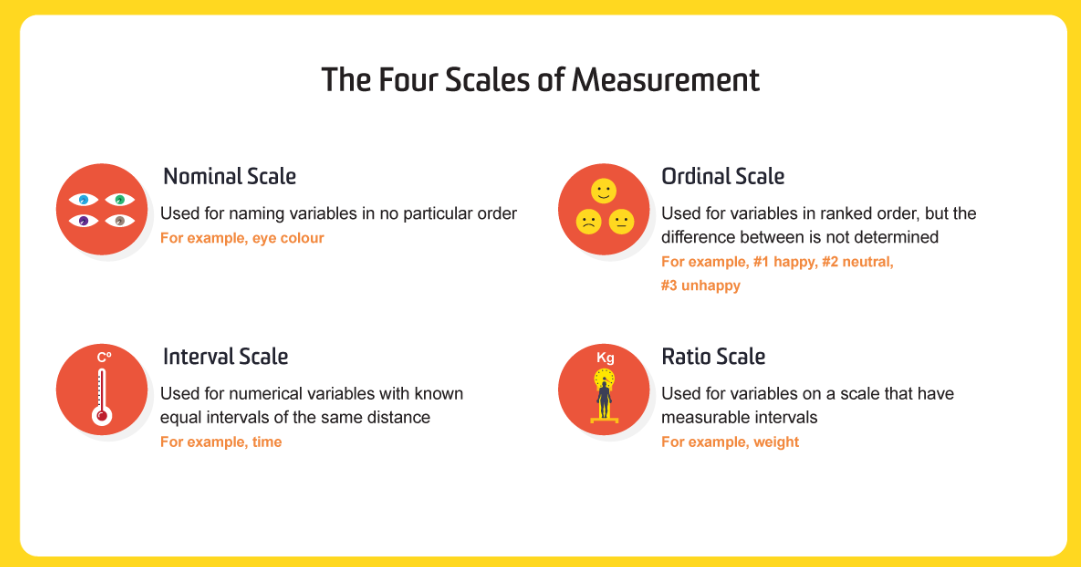





In [851]:
# Python Datatypes for ED Dataset

# Firstly we are going to look at the layout and data types of the variables in the ED Dataset

#Author: Audrey Allen

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in CSV file

EDAttendances24Hour  = pd.read_csv('EDAttendances24Hour.csv')

# The code below outputs all of the variables and the variable type
# As you can see from the code below Pandas call the strings 'object' 
# and the numberic fields 'float64'

EDAttendances24Hour.info() 
        
# Below is an output of the Pandas info command. Three are 7 variables on the ED dataset. 

# 3 int64 type variables and 4 objects

# The Registration should be a datetime variable and it is declared as an object by Pandas.
# This is the date/time that a patient enters the Emergency Department

# In order to plot this datetime variable I need to convert this variable from an object to a datetime in Pandas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   REGISTRATION        123 non-null    object
 1   DISCH_DEST          123 non-null    object
 2   Age                 123 non-null    int64 
 3   Hours_in_Deparment  123 non-null    int64 
 4   TRIAGE_CATEGORY     123 non-null    int64 
 5   GENDER              123 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.9+ KB


### Registration

The Date of Attendance is the date the patient registers with the Emergency Department. The field should be in datetime format. Intially when the data is imported it is imported as an object. I will convert this field into a datetime field now and call the new field RegDateTime. Once the date is converted into a datetime object this dataframe is now known as a timeseries.

### Variable Type of RegDateTime

RegDateTime is a quantitative, continuous interval variable. This basically means that this variable can be measured, can be broken down further (Not a whole number) and have know differences between the variables. (such as time difference, minutes, hours etc.)


### Distribution of this RegDateTime

I am going to look at what the distribution of this datetime field looks like.  

I will create a histogram of the new datetime variable (RegDateTime). 

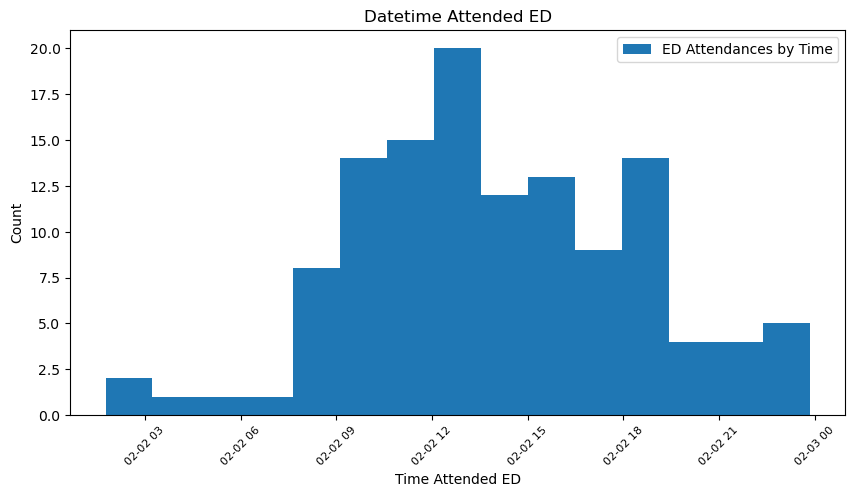

0     2023-02-02 23:51:00
1     2023-02-02 09:13:00
2     2023-02-02 14:06:00
3     2023-02-02 08:17:00
4     2023-02-02 17:31:00
              ...        
118   2023-02-02 22:48:00
119   2023-02-02 12:25:00
120   2023-02-02 15:21:00
121   2023-02-02 11:03:00
122   2023-02-02 17:04:00
Name: RegDateTime, Length: 123, dtype: datetime64[ns]

In [852]:
# I need to convert the REGISTRATION variable into a datetime data type as Pandas is not recognizing
# REGISTRATION as a datetime variable.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt



df = pd.read_csv('EDAttendances24Hour.csv')

df['REGISTRATION']

# convert to datetime using pd.to_datetime
pd.to_datetime(df['REGISTRATION'])

# I now need to add in a new REGISTRATION field in the datetime format into my dataset

df['RegDateTime'] = pd.to_datetime(df['REGISTRATION'])



#df

df['RegDateTime']



# Create a histogram to see the distribution of the datetime variable

plt.figure(figsize = (10, 5))
plt.hist(df.RegDateTime,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Time'])
plt.title("Datetime Attended ED")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Time Attended ED", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Time_Attended_ED.png')# Save to PNG file in the Images folder
plt.show()

df

df['RegDateTime']



### RegDateTime (REGISTRATION)- Type of Distribution - 

The type of distribution for the datetime variable RegDateTime looks to be a 'Normal Distribution' as it fits the bell curve model. 

It makes sense as the busiest time of the day in an Emergency Department would be in the middle of the day and we can see this from the bell curve in the middle of the 24 hour period.

The highest point on the curve, or the top of the bell, represents the most probable event in a series of data (its mean, mode, and median in this case), while all other possible occurrences are symmetrically distributed around the mean, creating a downward-sloping curve on each side of the peak. The width of the bell curve is described by its standard deviation.

I want to randomly generate a datetime series of data that fits a similar distribution as the ACTUAL ED attendances. I am going to simulate an Emergency Department dataset over a 24 hour period but you can choose whatever time period you wish.

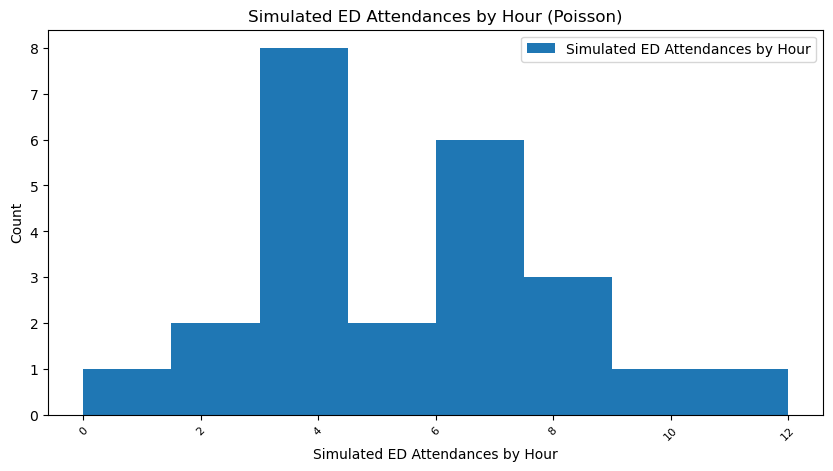

                     Attendances
2023-11-02 00:00:00            8
2023-11-02 01:00:00            6
2023-11-02 02:00:00            5
2023-11-02 03:00:00            7
2023-11-02 04:00:00            4
2023-11-02 05:00:00            7
2023-11-02 06:00:00            4
2023-11-02 07:00:00            4
2023-11-02 08:00:00            2
2023-11-02 09:00:00            6
2023-11-02 10:00:00            5
2023-11-02 11:00:00           10
2023-11-02 12:00:00            8
2023-11-02 13:00:00            3
2023-11-02 14:00:00            8
2023-11-02 15:00:00            2
2023-11-02 16:00:00            0
2023-11-02 17:00:00            7
2023-11-02 18:00:00            4
2023-11-02 19:00:00            3
2023-11-02 20:00:00            4
2023-11-02 21:00:00            3
2023-11-02 22:00:00            7
2023-11-02 23:00:00           12


In [853]:
# Randomly generate a timeseries for a period of 24 hours by Hour 
# Using the poisson distribution
# A Poisson distribution is a discrete probability distribution. (Discrete counts of number of effects within a given time) 
# It gives the probability of an event happening a certain number of times (k) within a given interval of time or space such 
# as ED attendances within an hour 

import numpy as np
import pandas as pd

rng = np.random.default_rng()

idx = pd.date_range("2023-11-02", periods=24, freq="H")

idx

ts = pd.DataFrame(data=rng.random(len(idx)), index=idx, columns=['Attendances'])

ts

# Use the numpy.random.poisson distrubtion to simulate a time series for say 24 hours or 1 day worth of data

# Synthesising a time series dataset

poisson = pd.DataFrame(data=rng.poisson(5,len(idx)), index=idx, columns=['Attendances'])

poisson


plt.figure(figsize = (10, 5))
plt.hist(poisson,8, histtype='bar', stacked=True)
plt.legend(['Simulated ED Attendances by Hour'])
plt.title("Simulated ED Attendances by Hour (Poisson)")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Simulated ED Attendances by Hour", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Simulated ED Attendances by Hour.png')# Save to PNG file in the Images folder
plt.show()


print(poisson)


The Poisson distribution does not fit the distrubtion of my actual ED dataset. I am going to try the numpy.random.randn. with my date range in question (24 hours or 123 attendances) This will return a sample (or samples) from the “standard normal” distribution. 

DatetimeIndex([          '2023-11-02 00:00:00',
               '2023-11-02 00:11:48.196721311',
               '2023-11-02 00:23:36.393442622',
               '2023-11-02 00:35:24.590163934',
               '2023-11-02 00:47:12.786885245',
               '2023-11-02 00:59:00.983606557',
               '2023-11-02 01:10:49.180327868',
               '2023-11-02 01:22:37.377049180',
               '2023-11-02 01:34:25.573770491',
               '2023-11-02 01:46:13.770491803',
               ...
               '2023-11-02 22:13:46.229508196',
               '2023-11-02 22:25:34.426229508',
               '2023-11-02 22:37:22.622950819',
               '2023-11-02 22:49:10.819672131',
               '2023-11-02 23:00:59.016393442',
               '2023-11-02 23:12:47.213114754',
               '2023-11-02 23:24:35.409836065',
               '2023-11-02 23:36:23.606557377',
               '2023-11-02 23:48:11.803278688',
                         '2023-11-03 00:00:00'],
              dtype=

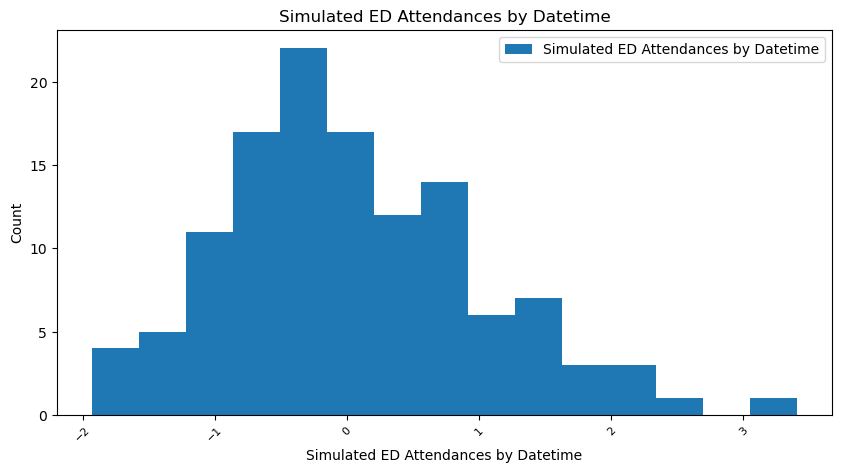

In [854]:
import datetime
import random
import numpy as np
import pandas as pd
from numpy import savetxt
from numpy import asarray

Daterange=pd.date_range("2023-11-02", "2023-11-03", periods=123) # 123 attendances in one 24 hour period

ts = pd.Series(np.random.randn(len(Daterange)), index=Daterange)

ts.index

print(ts.index)

plt.figure(figsize = (10, 5))
plt.hist(ts,15, histtype='bar', stacked=True)
plt.legend(['Simulated ED Attendances by Datetime'])
plt.title("Simulated ED Attendances by Datetime")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Simulated ED Attendances by Datetime", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Simulated ED Attendances by Datetime.png')# Save to PNG file in the Images folder
plt.show()

The simulated datetime attendances for 123 attendances over a period of a day looks like a normal distribution. It looks similar to the actual distribution of the data for 24 hours. 

Again we can see a the histogram is in a bell curve shape meaning that most of the attendances are clustered around the mean. It is a normal distribution.

### Age

The age of the patient is a variable that tells us what age the patient was at the time of the attendance to the Emergency Department. 

### Variable Type of Age

Age is an non-zero integer data type. This means that noone will ever have an age of 0. For this purpose the age will be given in years only so no decimal places. Age as it is a whole number with no decimal places it is a discrete variable. Pandas declares the variable age as an int64.


### Distribution of Age

In order to simulate this variable within a dataset I need to see what the distribution is through the 24 period.The best visual tool for this variable would again be a histogram.


              Age  Hours_in_Deparment  TRIAGE_CATEGORY
count  123.000000          123.000000       123.000000
mean    52.487805            7.804878         3.097561
std     24.763923            5.372453         0.694411
min      4.000000            0.000000         2.000000
25%     35.500000            4.000000         3.000000
50%     52.000000            6.000000         3.000000
75%     76.000000           12.000000         4.000000
max     98.000000           27.000000         5.000000
int64


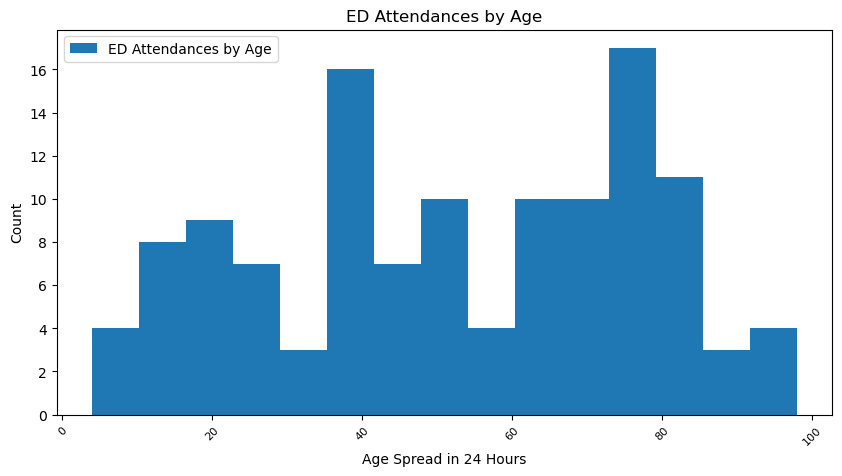

In [855]:
#Histogram of Age variable


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('EDAttendances24Hour.csv')

summary = df.describe()

print(summary)

df


# Output datatype of the column age
AgeDataType  = df['Age'].dtypes

print(AgeDataType)

# Create a histogram to see the distribution of the datetime variable

plt.figure(figsize = (10, 5))
plt.hist(df.Age,15, histtype='bar', stacked=True)
plt.legend(['ED Attendances by Age'])
plt.title("ED Attendances by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Age Spread in 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/ED Attendances by Age.png')# Save to PNG file in the Images folder
plt.show()



From the age histogram above I can see that the distribution of age accross 24 hours is not 100% a normal distribution. You could say that there are 3 spikes accross the day and each spike is normally distributed. 

This makes sense as you would imagine the age spread in an emergency department would be spread accross all ages throughout a 24 period.

I am going to use thee np.random.normal distribution as this is the closest distribution to the original data in my dataset. The histogram looks similar to the original histogram for the age variable.

[ 53  54  61  78  45  79  59  74  63  48   1  48  57  67  66  17  18  49
  61  27  68  32  70  76  93  69  55  62  59  20 105  50  55  64  45  69
  44  57  67  77  -1  21  89  43  15  53  26 103  78   7  23  33  30  36
  15  51  80  43  46  80  65  42  28  60  45  70  27  73  22  35  22  13
  14  41  26  68  34  32  31  48  48  72  25  64  45  76 106  77  38  78
  34  70  74  44  82  34  37  37   5  94  76  68  14   7  44   6  30  36
  44  39   6  38  66  43  68  32  51  42  29  61  47  59  38]


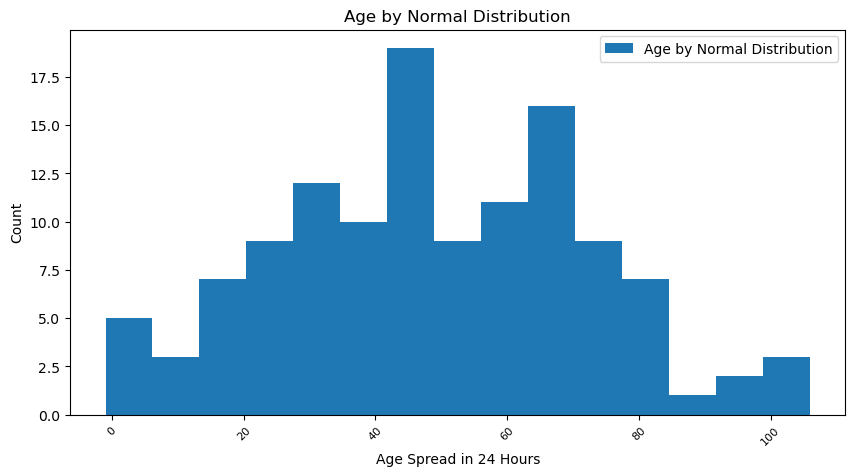

In [856]:
# To simulate a variable using the np.random.normal distribution I need to get the mean and standard deviation from the original 
# variable.

import numpy as np

# Generate Distribution:
mu, sigma = 53, 25 # mean and standard deviation

randomNums = np.random.normal(mu,sigma, size=123)
randomInts = np.round(randomNums)

print(randomInts.astype(int))

randomInts1 = randomInts.astype(int) 

# Plot:
#axis = np.arange(start=min(randomInts), stop = max(randomInts) + 1)


plt.figure(figsize = (10, 5))
plt.hist(randomInts,15, histtype='bar', stacked=True)
plt.legend(['Age by Normal Distribution'])
plt.title("Age by Normal Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Age Spread in 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Age by Normal Distribution.png')# Save to PNG file in the Images folder
plt.show()



### DISCH_DEST

The DISCH_DEST is the location the patient goes to after they leave the emergency department. 

### Variable Type of DISCH_DEST

DISCH_DEST is a categorical variable. A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.

There are 6 distinct values for this variable.

I can use the unique() function to output these values

The values are 

- 'Did Not Wait'
- 'Discharged Home' 
- 'Admitted to Ward'
- 'Discharged / Transferred to another hospital'
- 'Referred to OPD'
- 'Discharged to nursing Home'


Pandas declares the variable DISCH_DEST as an object.


### Distribution of DISCH_DEST

In order to simulate this variable within a dataset I need to see what the distribution is through the 24 period. The best visual tool for this variable would again be a histogram.


['Did Not Wait' 'Discharged Home' 'Admitted to Ward'
 'Discharged / Transferred to another hospital' 'Referred to OPD'
 'Discharged to nursing Home']
object


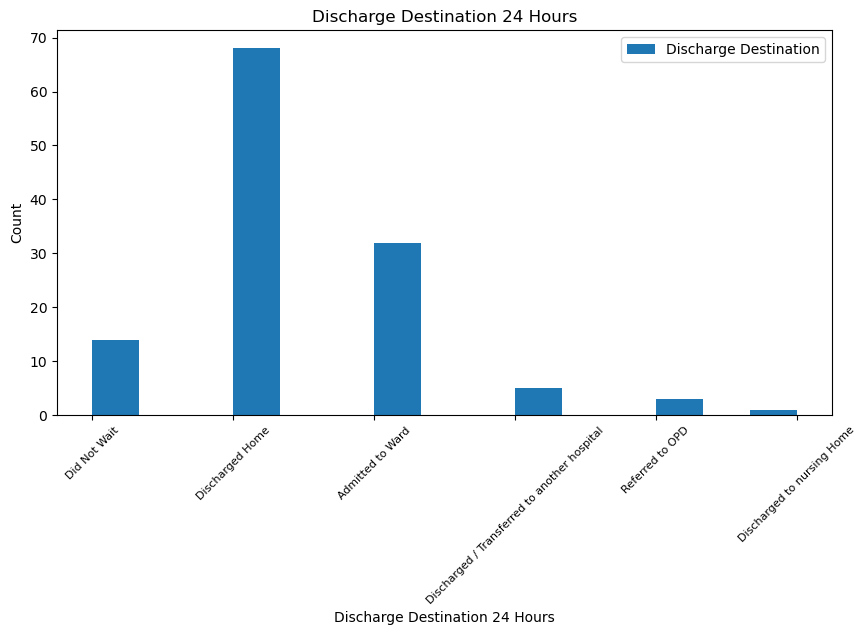

In [857]:
# Histogram for Discharge Distination Variable

df = pd.read_csv('EDAttendances24Hour.csv')

# Output unique values of the column DISCH_DEST

unique_vals = df['DISCH_DEST'].unique()

print(unique_vals)

# Output datatype of the column age
DISCHDESTDataType  = df['DISCH_DEST'].dtypes

print(DISCHDESTDataType)


plt.figure(figsize = (10, 5))
plt.hist(df.DISCH_DEST,15, histtype='bar', stacked=True)
plt.legend(['Discharge Destination'])
plt.title("Discharge Destination 24 Hours")
plt.xlabel("DISCH_DEST")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Discharge Destination 24 Hours", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Discharge Destination 24 Hours.png')# Save to PNG file in the Images folder
plt.show()



In [858]:
import pandas as pd
import seaborn as sns    
import matplotlib.pyplot as plt

EDAttendances24Hour  = pd.read_csv('EDAttendances24Hour.csv')

df = EDAttendances24Hour['DISCH_DEST'].value_counts() 
print(df) 


# one way frequency table for the DISCH_DEST column. 
freq_table = pd.crosstab(EDAttendances24Hour['DISCH_DEST'], 'Count_of_DISCH_DEST') 
  
# frequency table in proportion of DISCH_DEST 
freq_table= freq_table/len(EDAttendances24Hour) 
  
freq_table 


Discharged Home                                 68
Admitted to Ward                                32
Did Not Wait                                    14
Discharged / Transferred to another hospital     5
Referred to OPD                                  3
Discharged to nursing Home                       1
Name: DISCH_DEST, dtype: int64


col_0,Count_of_DISCH_DEST
DISCH_DEST,
Admitted to Ward,0.260163
Did Not Wait,0.113821
Discharged / Transferred to another hospital,0.040650
Discharged Home,0.552846
Discharged to nursing Home,0.008130
Referred to OPD,0.024390


 ### Probability distribution for variable 'DISCH_DEST'
 
 To Calculate the probability distribution of the DISCH_DEST variable I will use np.random.choice.<br><br>
 Discharged Home is the most popular choice for discharge destination. <br><br>
 The frequency table above calculates the weights of each of the values.<br><br>
 np.random.choice is the probability distribution funcion that I will use and input the weights that have been calculated previously.<br><br>
 The weights of all the values in the array must equal 100.  <br><br>


In [859]:
# Probability distribution for variable 'DISCH_DEST'

import numpy as np

Discharge_arr = ['Admitted to Ward', 'Did Not Wait', 'Discharged / Transferred to another hospital', 'Discharged Home','Discharged to nursing Home','Referred to OPD' ]
Discharge_arr1 = np.random.choice(Discharge_arr, 123, p=[0.260163, 0.113821, 0.040650, 0.552846, 0.008130, 0.024390])
print (Discharge_arr1)

['Discharged Home' 'Admitted to Ward' 'Discharged Home' 'Admitted to Ward'
 'Discharged Home' 'Admitted to Ward' 'Discharged Home' 'Discharged Home'
 'Admitted to Ward' 'Did Not Wait' 'Discharged Home' 'Discharged Home'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Admitted to Ward'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Discharged Home'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Did Not Wait'
 'Discharged Home' 'Discharged Home' 'Discharged Home'
 'Discharged / Transferred to another hospital' 'Did Not Wait'
 'Admitted to Ward' 'Discharged Home' 'Discharged Home' 'Discharged Home'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Admitted to Ward'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Discharged Home'
 'Did Not Wait' 'Discharged Home' 'Admitted to Ward' 'Discharged Home'
 'Discharged Home' 'Discharged Home' 'Discharged Home' 'Admitted to Ward'
 'Discharged / Transferred to another hospital' 'Admitted to Ward'
 'Discharged

I am going to create a histogram for the simulated variable DISCH_DEST. It should have the same distribution as the actual histogram of the real data.

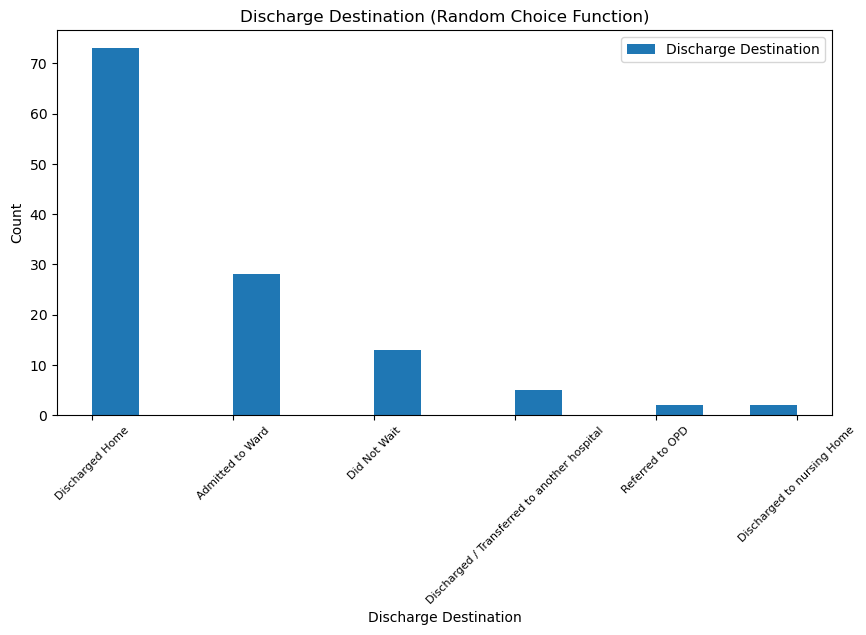

In [860]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.hist(Discharge_arr1,15, histtype='bar', stacked=True)
plt.legend(['Discharge Destination'])
plt.title("Discharge Destination (Random Choice Function)")
plt.xlabel("Discharge Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Discharge Destination", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Discharge Destination Random Choice.png')# Save to PNG file in the Images folder
plt.show()

###

### Hours_in_Department

The Hours_in_Deparment  variable is the number of hours a patient is in the department from regiration to departure. 

### Variable Type of Hours_in_Deparment

Hours_in_Deparment is a numerical variable. Hours_in_Deparment is a non-negative real number. This means that the numbers in this variable are positive but can be zero also. A Patient may spend less than an hour in the emergency department.

Pandas declares the variable DISCH_DEST as an int64 datatype.


### Distribution of Hours_in_Deparment

In order to simulate this variable within a dataset I need to see what the distribution is through the 24 period. The best visual tool for this variable would again be a histogram.

int64


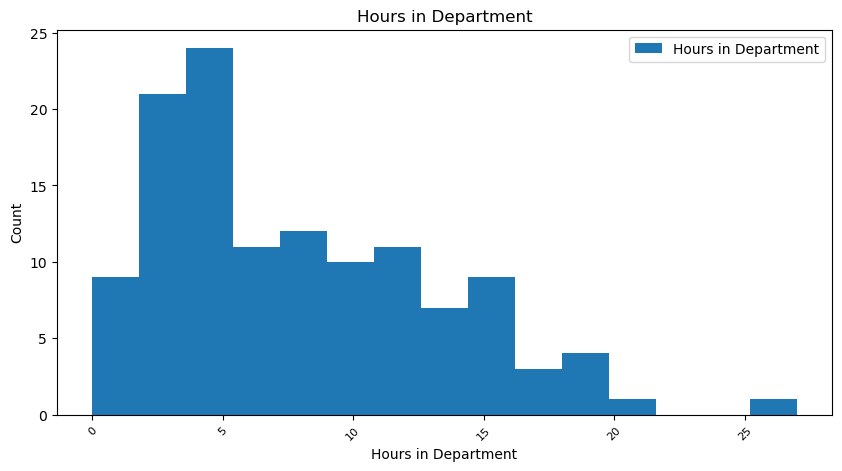

In [861]:
#Histogram of Hours_in_Department


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('EDAttendances24Hour.csv')

df


# Output datatype of the column age
Hours_in_Deparment_DT  = df['Hours_in_Deparment'].dtypes

print(Hours_in_Deparment_DT)

# Create a histogram to see the distribution of the Hours_in_Deparment variable

plt.figure(figsize = (10, 5))
plt.hist(df.Hours_in_Deparment,15, histtype='bar', stacked=True)
plt.legend(['Hours in Department'])
plt.title("Hours in Department")
plt.xlabel("Hours in Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Hours in Department", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Hours in Department.png')# Save to PNG file in the Images folder



From the histogram above I can see the distribution of the Hours_in_Deparment variable is right skewed.<br> <br>
I am going to try the np.random.triangular distribution. <br><br>
The triangular distribution is a continuous probability distribution with lower limit left, peak at mode, and upper limit right. <br><br>
Unlike the other distributions, these parameters directly define the shape of the histogram. <br><br>
This distribution can take in a number of parameters. <br><br>
These are random.triangular(left, mode, right, size=None). To get the min, mode, max I do a df.describe on the Hours_in_Deparment variable. <br><br>


In [862]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('EDAttendances24Hour.csv')

df

df['Hours_in_Deparment'].describe()

count    123.000000
mean       7.804878
std        5.372453
min        0.000000
25%        4.000000
50%        6.000000
75%       12.000000
max       27.000000
Name: Hours_in_Deparment, dtype: float64

Parameters for triangular distribution

- Min - 0
- Mode - 7.804878 (8)
- Max - 27
- Size = 123

[ 3  0  5  6  5 12 10  2 19  8 15  7  9  7  4 12 14  5 19  8 13  4  9  5
  7 14  3  7  8  3  5 10 22 23  5 15  7 13  9  4  7 12 12  8 10  8  6 10
  7  8 19  8 20  6  6 13 10  7  6 20 14 21  8 22  5  9 11  3  9 10  3  9
 12  7 16  5  7  6  4 20  4 17 20 13 10 15 17 13 16  8 16 16  2  5  3 12
 22 16 14  9  6  6 14  8 19  8  8 14 13  0 17 15  5  4 17  7 11  8 12 18
 20  4 18]


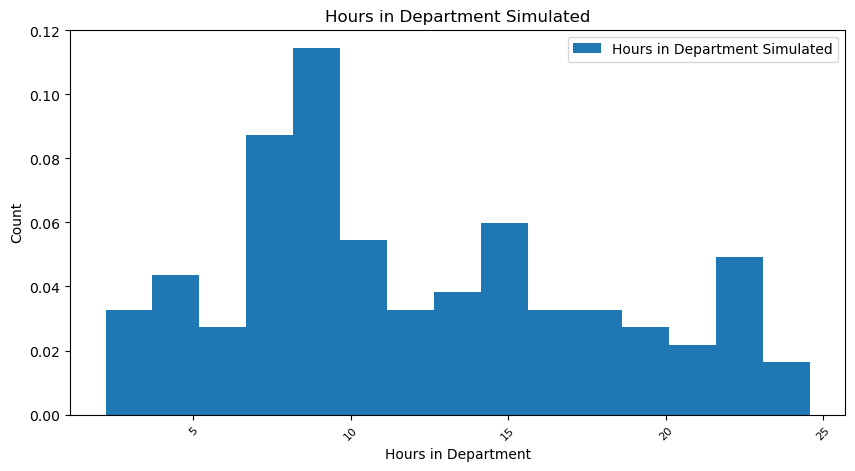

In [863]:
import matplotlib.pyplot as plt
import numpy as np
import math 
  


#triangular = np.random.triangular(0, 8, 27, 123).round(0)

triangular = np.random.triangular(0, 7.8, 27, 123)

print(triangular.astype(int))  

triangularint = triangular.astype(int)


plt.figure(figsize = (10, 5))
plt.hist(np.random.triangular(0, 8, 27, 123), bins=15,density=True,  histtype='bar', stacked=True)
#plt.hist(df.Hours_in_Department,15, histtype='bar', stacked=True)
plt.legend(['Hours in Department Simulated'])
plt.title("Hours in Department Simulated")
plt.xlabel("Hours in Department Simulated")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Hours in Department", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Hours in Department Simulated.png')# Save to PNG file in the Images folder
plt.show()



- The np.random.triangular distribution looks similar to the actual distribution of Hours_in_Deparment so I am going to simulate the hours in department field using this distribution and output the value to the csv file.


### TRIAGE_CATEGORY

The Triage Category is based on the Manchester triage system. The Manchester Triage System is one of Europe's most used triage systems considering five levels to prioritize patients in the ED: level 1 (red), immediate; level 2 (orange), very urgent; level 3 (yellow), urgent; level 4 (green), standard; level 5 (blue), non-urgent.

### Variable Type of TRIAGE_CATEGORY

TRIAGE_CATEGORY is a quantitative, discrete variable. This  means that this variable can only take certain values i.e. 1-5. You can count the values. The numbers are nondivisable. 


### Distribution of  TRIAGE_CATEGORY

I am going to look at what the distribution of this TRIAGE_CATEGORY field looks like.  

I will create a histogram of the new datetime variable (TRIAGE_CATEGORY). Firstly I am going to see what type of variable it is in Pandas. The variable TRIAGE_CATEGORY is datatype float64 in Pandas.

In [864]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('EDAttendances24Hour.csv')

df

df['TRIAGE_CATEGORY'].describe()

count    123.000000
mean       3.097561
std        0.694411
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: TRIAGE_CATEGORY, dtype: float64

To see the type of distribution I have created a histogram for triage category. 

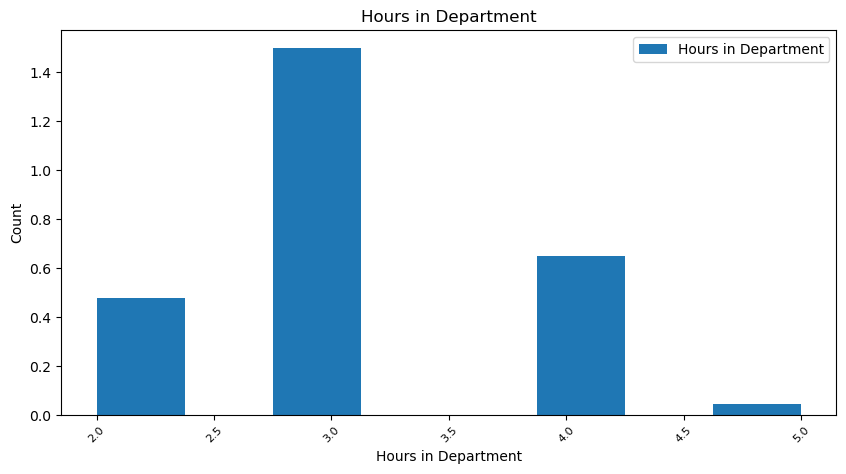

In [865]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('EDAttendances24Hour.csv')

plt.figure(figsize = (10, 5))
plt.hist(df['TRIAGE_CATEGORY'], bins=8,density=True,  histtype='bar', stacked=True)
plt.legend(['Hours in Department'])
plt.title("Hours in Department")
plt.xlabel("Hours in Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Hours in Department", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Hours in Department.png')# Save to PNG file in the Images folder
plt.show()


I want to see the frequency of each category of triage from 1-5. I can do this by using the freq command in pandas. 

In [866]:
# Read in CSV file

import pandas as pd

df = pd.read_csv('EDAttendances24Hour.csv')

# one way frequency table for the species column. 
freq_table = pd.crosstab(df['TRIAGE_CATEGORY'], 'triage_category') 
  
# frequency table in proportion of species 
freq_table= freq_table/len(df) 
  
freq_table 

col_0,triage_category
TRIAGE_CATEGORY,
2,0.178862
3,0.560976
4,0.243902
5,0.016260


In order to simulate the triage catgory data I am going to use  random.randint(0, 10) function to generate random integers between and including 1 and 5. (Even though 1 is not in my base dataset I want to simulate a dataset with this triage category in it)

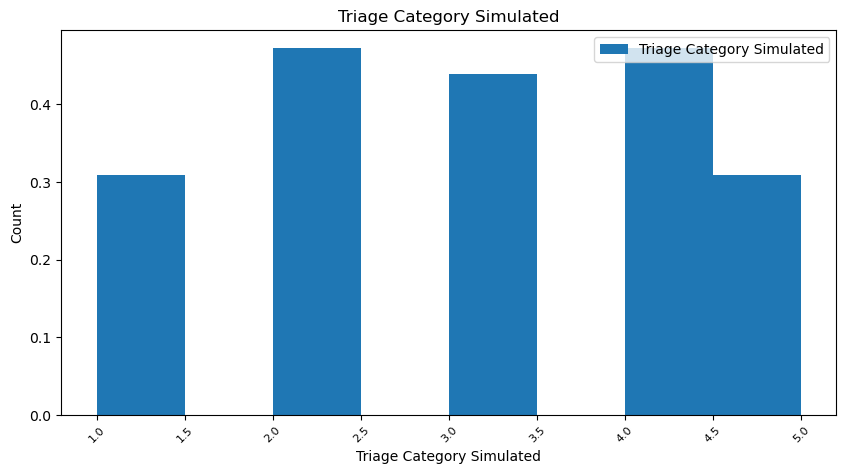

In [867]:
import random
import matplotlib.pyplot as plt
import numpy as np


Triagedata = [random.randint(1, 5) for _ in range(123)]
plt.figure(figsize = (10, 5))
plt.hist(Triagedata, bins=8,density=True,  histtype='bar', stacked=True)
plt.legend(['Triage Category Simulated'])
plt.title("Triage Category Simulated")
plt.xlabel("Triage Category Simulated")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Triage Category Simulated", fontsize=10)
plt.xticks(fontsize=8)
plt.savefig('Images/Triage Category Simulated.png')# Save to PNG file in the Images folder
plt.show()


  

### GENDER

The GENDER variable is the sex or gender of the patient that has registered in the emergency department.

### Variable Type of GENDER

Gender a categorical variable. A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.

There are 2 distinct values for this variable.

I can use the unique() function to output these values

The values are 

- 'Male'
- 'Female'

Pandas declares the variable GENDER as an object.


### Distribution of  GENDER

I am going to look at what the distribution of this GENDER field looks like. Again I am going to look at the frequency of this variable and use this calculation to simulate my gender variable for my dataset.



In [868]:
# Read in CSV file

import pandas as pd

df = pd.read_csv('EDAttendances24Hour.csv')

# one way frequency table for the species column. 
freq_table = pd.crosstab(df['GENDER'], 'GENDER') 
  
# frequency table in proportion of species 
freq_table= freq_table/len(df) 
  
freq_table 

col_0,GENDER
GENDER,
Female,0.552846
Male,0.447154


From the freq command in Pandas I can see that there was marginally more females that attended the department that day. I can use the calculation when simulating my data for this variable. Using the np.random.choice variable I can simulate gender category data based on the frequency split.

In [869]:
# Probability distribution for variable 'GENDER'

import numpy as np

GENDER_arr = ['Female', 'Male' ]
GENDER_arr1 = np.random.choice(GENDER_arr, 123, p=[0.552846, 0.447154])
print (GENDER_arr1)

['Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male'
 'Male' 

In [870]:
# Simulated ED dataset - Outputting all the variables to a .csv file

SimulatedED = {'DateofAttendance1': ts.index,
                'DISCH_DEST': (Discharge_arr1),
                'Age': (randomInts1),
                'Hours_in_Department': (triangularint),
                'TRIAGE_CATEGORY': (Triagedata),
                'Sex': (GENDER_arr1),
              
                
               
                }
dfsimulation = pd.DataFrame(SimulatedED)

# Save the dataframe to a CSV file
dfsimulation.to_csv('SimulatedED.csv', index=False)

### Correlation in my Dataset

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.<br><br>

Correlation is measured by the correlation coefficient, r. This measurement quantifies the strength of the relationship between the variables.<br><br>

The closer r is to zero the weaker the relationship between the variables.<br><br>

Positive r values indicate a positive relationship between the variables in question. (Above 0.7)<br><br>

Negative r values indicate a negative relationship between the variables. <br><br>

To measure the correlation between variables I will use the Pearsons method. This measures the linear correlation between variables.<br><br>

In regards to Emergency Department data two variables that I would like to look at is the Age of the patient and the length of stay in the department. It will be interesting to see if there is a correlation between these two variables.



### Correlation with Original Dataset 

Looking at the correlation between the two variables age and Hours_in_Deparment. Is there a positive or negative or neutral correclation between the variables. <br><br>

Run the code below which calculates the Pearsons correlation coefficient for the original dataset. <br><br>

The Pearsons correlation is 0.272. A correlation between 0.25 and 0.5 is considered to be a "weak" correlation between the two variables. 

In [871]:
# Import libraries - Check correlation of Age and Hours_in_Deparment
import pandas as pd
from scipy.stats import pearsonr
 
# Import your data into Python
df = pd.read_csv("EDAttendances24Hour.csv")
 
# Convert dataframe into series
list1 = df['Age']
list2 = df['Hours_in_Deparment']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.272


I am going to create a scatterplot for Age and Hours_in_Deparment to visually see the correlation between the two variables. 

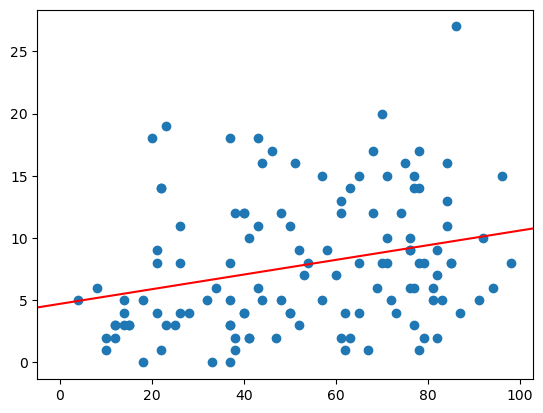

In [872]:
# We know the actual correlation of the two variables is 0.272 which is a weak correlation. I can see from the scatterplot below 
# that the data is not linear.

import matplotlib.pyplot as plt

plt.scatter(list1, list2)
m, b = np.polyfit(list1, list2, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$y = {m:.2f}x {b:+.2f}$')
plt.show()

### Correlation with Simulated Dataset 

The correlation on my simulated data for both Age and Hours_in_Deparment is also not linear or positive. Because the values are generated using the random distribution generator the correlation coefficient will change each time I run my jupyter notebook. 

In [873]:
# Import libraries - Check correlation of Age and Hours_in_Deparment - Simulated Dataset 
import pandas as pd
from scipy.stats import pearsonr
 
# Import your data into Python
df = pd.read_csv("SimulatedED.csv")
 
# Convert dataframe into series
list1 = df['Age']
list2 = df['Hours_in_Department']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.058


### References

https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Psychologist%20Stanley%20Stevens%20developed%20the,to%20properly%20analyse%20the%20data